In [1]:
import numpy as np
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import librosa.display
from tensorflow.keras import layers, models



In [2]:
clean_dir = r'C:\Users\Siddhartha Devan V\Downloads\Fellowship\complete_dataset\Clean\spectrogram'
noise_dir = r'C:\Users\Siddhartha Devan V\Downloads\Fellowship\complete_dataset\Noise\spectrogram'

clean_spect_paths = os.listdir(clean_dir)
noise_spect_paths = os.listdir(noise_dir)

for i, j in zip(clean_spect_paths, noise_spect_paths):
    print(i,j)
    if i != j:
        print('not equal')

100_0.npy 100_0.npy
100_1.npy 100_1.npy
100_2.npy 100_2.npy
100_3.npy 100_3.npy
101_0.npy 101_0.npy
101_1.npy 101_1.npy
101_2.npy 101_2.npy
101_3.npy 101_3.npy
101_4.npy 101_4.npy
102_0.npy 102_0.npy
102_1.npy 102_1.npy
102_2.npy 102_2.npy
102_3.npy 102_3.npy
103_0.npy 103_0.npy
103_1.npy 103_1.npy
103_2.npy 103_2.npy
103_3.npy 103_3.npy
104_0.npy 104_0.npy
104_1.npy 104_1.npy
104_2.npy 104_2.npy
104_3.npy 104_3.npy
11_0.npy 11_0.npy
11_1.npy 11_1.npy
12_0.npy 12_0.npy
12_1.npy 12_1.npy
13_0.npy 13_0.npy
13_1.npy 13_1.npy
14_0.npy 14_0.npy
14_1.npy 14_1.npy
15_0.npy 15_0.npy
15_1.npy 15_1.npy
16_0.npy 16_0.npy
16_1.npy 16_1.npy
17_0.npy 17_0.npy
17_1.npy 17_1.npy
17_2.npy 17_2.npy
18_0.npy 18_0.npy
18_1.npy 18_1.npy
18_2.npy 18_2.npy
18_3.npy 18_3.npy
18_4.npy 18_4.npy
19_0.npy 19_0.npy
19_1.npy 19_1.npy
19_2.npy 19_2.npy
19_3.npy 19_3.npy
19_4.npy 19_4.npy
1_0.npy 1_0.npy
1_1.npy 1_1.npy
1_2.npy 1_2.npy
1_3.npy 1_3.npy
1_4.npy 1_4.npy
201_0.npy 201_0.npy
202_0.npy 202_0.npy
203_0.npy 

In [3]:
clean_spect_paths = [os.path.join(clean_dir, i) for i in clean_spect_paths]
noise_spect_paths = [os.path.join(noise_dir, i) for i in noise_spect_paths]

print(clean_spect_paths[:5])
print()
print(noise_spect_paths[:5])

['C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_0.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_1.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_2.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_3.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\101_0.npy']

['C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_0.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_1.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_2.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_3.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowshi

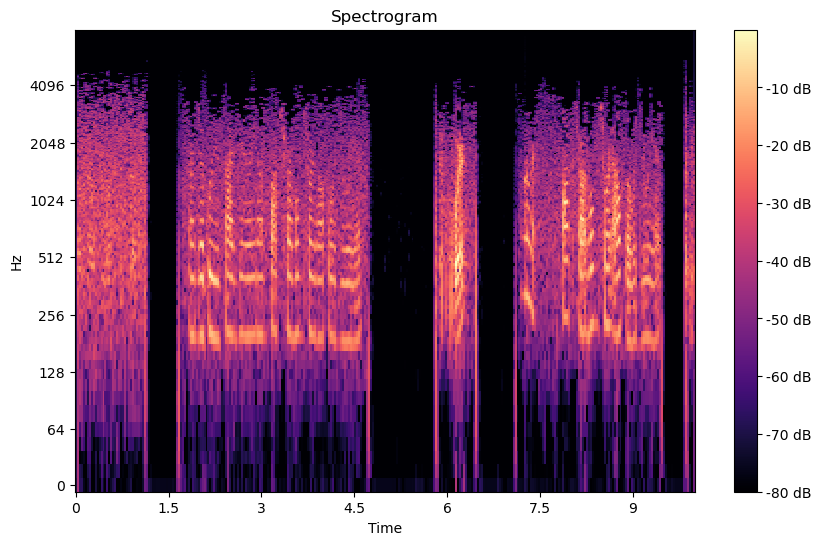

In [4]:
def plot_spectrogram(spectrogram, sr=16000, hop_length=512, title="Spectrogram"):
    """
    Visualizes a spectrogram using librosa and matplotlib.
    """
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()
plot_spectrogram(np.load(clean_spect_paths[0]))

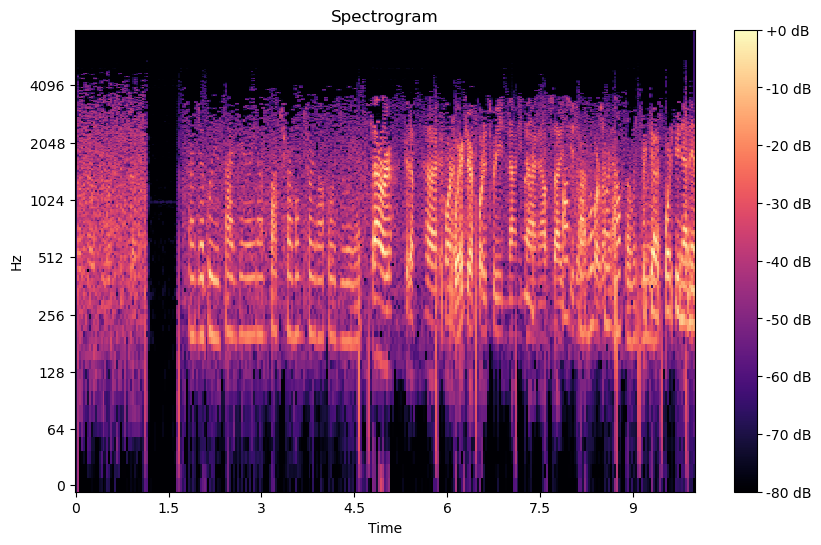

In [5]:
plot_spectrogram(np.load(noise_spect_paths[0]))

In [6]:
np.load(noise_spect_paths[0]).dtype

dtype('float32')

In [7]:
from sklearn.model_selection import train_test_split

train_noisy, test_noisy, train_clean, test_clean = train_test_split(noise_spect_paths, clean_spect_paths, test_size=0.2, random_state=42)


In [8]:
print(len(train_noisy))
print(len(test_noisy))
print(len(train_clean))
print(len(test_clean))

119
30
119
30


In [9]:
train_data = tf.data.Dataset.from_tensor_slices((train_noisy, train_clean))
test_data = tf.data.Dataset.from_tensor_slices((test_noisy, test_clean))



In [10]:
def loader_func(noise_path, clean_path):
    noise = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x).astype(np.float16), axis = -1), [noise_path], tf.float16))
    clean = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x).astype(np.float16), axis = -1), [clean_path], tf.float16))
                              
    return noise, clean

train_data = train_data.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)


batch_size = 2 # Choose an appropriate batch size for your model

# Batch the dataset
train_data = train_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)



# Batch the dataset
test_data = test_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [11]:
for x, y in train_data.take(2):
    print(x.shape, x.dtype)
    
    

(2, 513, 313, 1) <dtype: 'float16'>
(2, 513, 313, 1) <dtype: 'float16'>


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Input shape (height, width, channels)
input_shape = (513, 313, 1)

# Build the model
def build_denoising_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Output: (256, 157, 32)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Output: (128, 79, 64)
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # Output: (64, 40, 128)
    
    # Bottleneck
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)  # Output: (64, 40, 256)
    
    # Decoder with explicit upsampling layers
    x = layers.UpSampling2D((2, 2))(x)  # Output: (128, 80, 256)
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)  # Output: (128, 80, 128)
    
    x = layers.UpSampling2D((2, 2))(x)  # Output: (256, 160, 128)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)  # Output: (256, 160, 64)
    
    x = layers.UpSampling2D((2, 2))(x)  # Output: (512, 320, 64)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)  # Output: (512, 320, 32)

    # Final reconstruction to match the input shape
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Output: (513, 313, 1)

    outputs = layers.Cropping2D(cropping=((3, 4), (3, 4)))(outputs)
    # outputs = layers.Cropping2D(cropping=((0,1), (1,1)))(outputs)
    # Create the model
    autoencoder = models.Model(inputs, outputs)
    
    return autoencoder

# Build the model
autoencoder = build_denoising_autoencoder(input_shape)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse', metrics = 'mae')

# Summary of the model



In [22]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 513, 313, 1)]     0         
                                                                 
 conv2d_23 (Conv2D)          (None, 513, 313, 32)      320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 257, 157, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 257, 157, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 129, 79, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 129, 79, 128)      7385

In [23]:
history = autoencoder.fit(train_data, epochs=25)

Epoch 1/25
60/60 [==============================] - 21s 301ms/step - loss: 4.1605 - mae: 0.4466
Epoch 2/25
60/60 [==============================] - 18s 289ms/step - loss: 4.0896 - mae: 0.3043
Epoch 3/25
60/60 [==============================] - 13s 223ms/step - loss: 4.0780 - mae: 0.2929
Epoch 4/25
60/60 [==============================] - 14s 238ms/step - loss: 4.0883 - mae: 0.3069
Epoch 5/25
60/60 [==============================] - 20s 321ms/step - loss: 4.0775 - mae: 0.2927
Epoch 6/25
60/60 [==============================] - 7s 119ms/step - loss: 4.0751 - mae: 0.2917
Epoch 7/25
60/60 [==============================] - 16s 263ms/step - loss: 4.0738 - mae: 0.2908
Epoch 8/25
60/60 [==============================] - 12s 186ms/step - loss: 4.0742 - mae: 0.2935
Epoch 9/25
60/60 [==============================] - 16s 265ms/step - loss: 4.0724 - mae: 0.2891
Epoch 10/25
60/60 [==============================] - 12s 196ms/step - loss: 4.0706 - mae: 0.2881
Epoch 11/25
60/60 [=====================

In [21]:
for x, y in train_data.take(1):
    y_pred = autoencoder.predict(x)
    print("Predicted shape:", y_pred.shape)
    print("True shape:", y.shape)

1/1 [==============================] - 20s 20s/step
Predicted shape: (2, 513, 313, 1)
True shape: (2, 513, 313, 1)


In [25]:
autoencoder.evaluate(test_data)

15/15 [==============================] - 1s 49ms/step - loss: 3.8294 - mae: 0.2643


[3.8293654918670654, 0.2642975449562073]

In [26]:
denoised_output = autoencoder.predict(test_data)

15/15 [==============================] - 1s 57ms/step


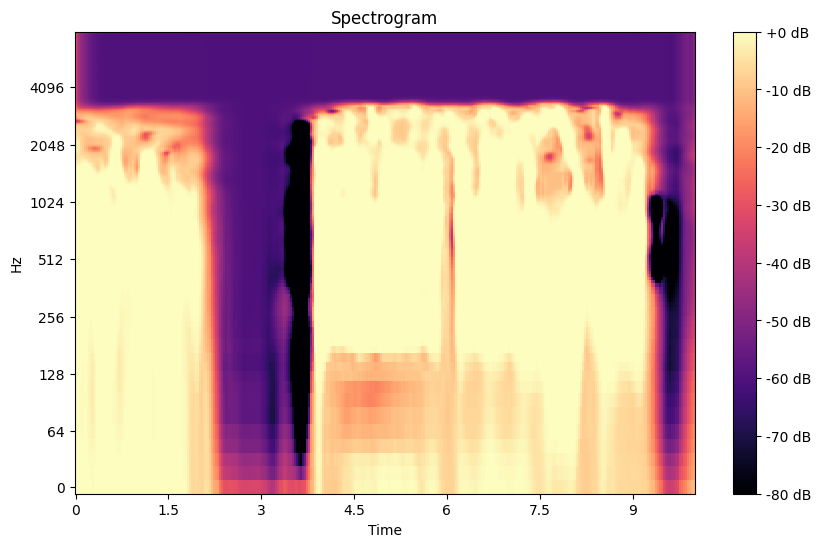

In [ ]:
plot_spectrogram(np.squeeze(denoised_output[2]))

In [28]:
import librosa
import numpy as np

def spectrogram_to_audio(stft_matrix, hop_length=512):
    # Convert complex-valued STFT back to audio
    audio = librosa.istft(stft_matrix, hop_length=hop_length)
    return audio

In [29]:
audio = spectrogram_to_audio(np.squeeze(denoised_output[2]))
librosa.output.write_wav('out_6_v2.wav', audio, sr=16000)

AttributeError: No librosa attribute output

In [37]:
import librosa
import soundfile as sf
import numpy as np

# For STFT output
def spectrogram_to_audio(stft_matrix, hop_length=512):
    # Convert complex-valued STFT back to audio
    audio = librosa.istft(stft_matrix, hop_length=hop_length)
    return audio

# For Mel-spectrogram output
def mel_to_audio(mel_spectrogram, sample_rate=16000, hop_length=512, n_fft=2048):
    # Convert from dB to power (inverse of power_to_db)
    mel_spectrogram = librosa.db_to_power(mel_spectrogram)
    
    # Use Griffin-Lim algorithm to estimate the phase and convert to audio
    audio = librosa.feature.inverse.mel_to_audio(mel_spectrogram, sr=sample_rate, hop_length=hop_length, n_fft=n_fft)
    
    return audio

# Example usage:
# For STFT:
stft_matrix = np.squeeze(denoised_output[2]) # Load your STFT (complex values) from model output
audio = spectrogram_to_audio(stft_matrix)
sf.write('out_v2_2.wav', audio, 16000)  # Save back to a .wav file

# For Mel- # Save back to a .wav file


In [2]:
from object_detection.utils import label_map_util

ModuleNotFoundError: No module named 'object_detection'